# Walmart Sales Forecasting Analysis using TS & DL
## Hengly aun : Micro-Projects:

# #4 : 26 August 2023

https://github.com/aunhengly/ana500-microProject/blob/main/Hengly-MicroProject.ipynb

# Problem Statement 
- Background:
The dataset contains information about the sales data of Walmart for different stores and departments, including the date and whether it's a holiday or not. The objective is to build predictive models that can forecast future sales, considering the temporal nature of the data.


- Objective(s):

  - Develop a time series analysis to understand the patterns and trends in the sales data over time.
  - Create a predictive model using linear regression to predict weekly sales based on store, department, and holiday information.
  - Apply time series forecasting techniques to predict future sales for each store and department.
  - Explore the potential of deep learning models, specifically LSTM, to forecast sales and compare their performance with traditional time series models.

# Data Dictionary:

This is the historical training data, which covers 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

- Store: Represents the ID or number of a specific store.
- Dept: Represents the department within a store.
- Date: The date of the recorded data.
- Weekly_Sales: The sales value for that particular week.
- IsHoliday: Indicates whether the week includes a holiday (True or False).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from seasonal import fit_seasons, adjust_seasons

DATA = Path('/Users/henglyaun/ANA500/Data/Walmart')
dfraw = pd.read_csv(DATA / 'train.csv')

#Source: https://www.kaggle.com/code/arunkumar1809/walmart-sales-advanced-analysis-and-prediction/notebook

In [6]:
# Quick overview of the data
print("Datase shape:", dfraw.shape,"\n")
print('The first few lines of the data:\n ', dfraw.head())
print('\nThe last few lines of the data:\n ', dfraw.tail())

Datase shape: (421570, 5) 

The first few lines of the data:
     Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

The last few lines of the data:
          Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False


In [7]:
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [8]:
# Check for missing values
missing_values = dfraw.isnull().sum()
percentage_missing = (missing_values / len(dfraw)) * 100
print(pd.DataFrame({'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

              missing  pc_missing
Store               0         0.0
Dept                0         0.0
Date                0         0.0
Weekly_Sales        0         0.0
IsHoliday           0         0.0


In [9]:
display(dfraw.describe(include='all'))

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


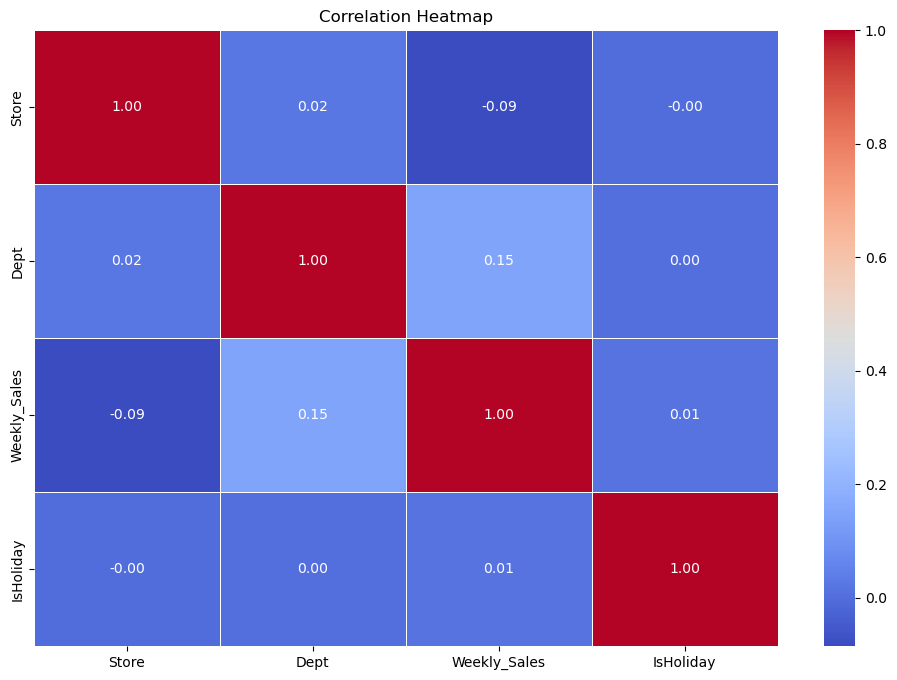

In [10]:
data= dfraw.drop('Date', axis=1)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix as numerical values
print(correlation_matrix.round(2))

              Store  Dept  Weekly_Sales  IsHoliday
Store          1.00  0.02         -0.09      -0.00
Dept           0.02  1.00          0.15       0.00
Weekly_Sales  -0.09  0.15          1.00       0.01
IsHoliday     -0.00  0.00          0.01       1.00


The interpretation of the correlations of the matrix:

- Store vs. Dept: The correlation coefficient is very close to 0 (0.02), indicating a very weak positive correlation between the Store and Dept variables. This suggests that there's almost no linear relationship between the store number and department number.

- Store vs. Weekly_Sales: The correlation coefficient is -0.09, indicating a weak negative correlation between the Store and Weekly_Sales variables. This suggests that there might be a slight tendency that as the store number increases, the weekly sales might decrease slightly. However, the correlation is weak, so this relationship is not very significant.

- Store vs. IsHoliday: The correlation coefficient is very close to 0 (-0.00), indicating essentially no correlation between the Store and IsHoliday variables. This means that the store number and whether a week is a holiday or not are not correlated.

- Dept vs. Weekly_Sales: The correlation coefficient is 0.15, indicating a weak positive correlation between the Dept and Weekly_Sales variables. This suggests that there might be a slight tendency that as the department number increases, the weekly sales also increase slightly. However, this correlation is again relatively weak.

- Dept vs. IsHoliday: The correlation coefficient is very close to 0 (0.00), indicating no correlation between the Dept and IsHoliday variables. This means that the department number and whether a week is a holiday or not are not correlated.

- Weekly_Sales vs. IsHoliday: The correlation coefficient is 0.01, indicating a very weak positive correlation between the Weekly_Sales and IsHoliday variables. This suggests that there's almost no relationship between weekly sales and whether a week is a holiday or not.

In summary, based on the correlation coefficients, there seem to be very weak or no significant linear relationships between these variables in the dataset.

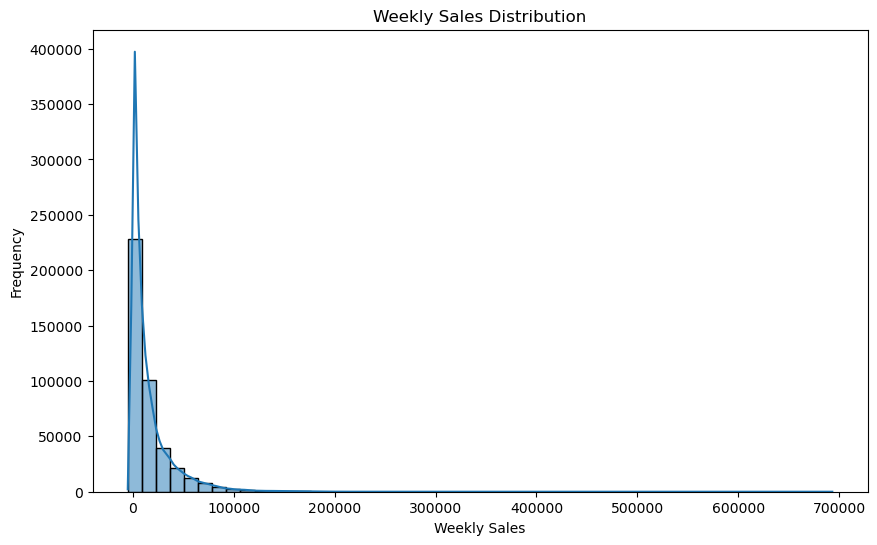

In [12]:
# Visualize sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

The graph shows that the weekly sales are normally distributed, with the highest frequency of sales between 200,000 and 300,000. There is a long tail to the right of the distribution, indicating that there are a few stores with very high weekly sales.

The KDE curve shows that the probability of a store having weekly sales of less than 100,000 is very low. The probability of a store having weekly sales of more than 500,000 is also very low.

Overall, the graph shows that the weekly sales for this store are normally distributed, with most stores having weekly sales between 200,000 and 300,000. There are a few stores with very high weekly sales, but these are outliers.

Mean Squared Error: 505771167.0


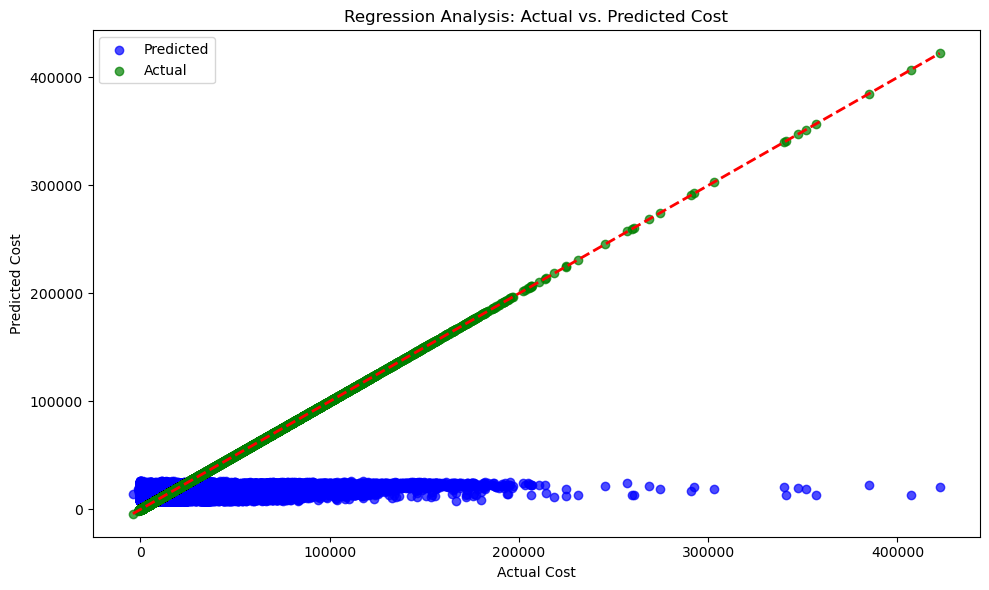

In [13]:
# Prepare features and target
X = data[['Store', 'Dept', 'IsHoliday']]
y = data['Weekly_Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse.round(2)}')

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)  # Blue for predicted values
plt.scatter(y_test, y_test, color='green', label='Actual', alpha=0.7)     # Green for actual values

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Regression Analysis: Actual vs. Predicted Cost')
plt.tight_layout()
plt.legend()
plt.show()

- The MSE is a measure of how well the linear regression model's predictions align with the actual values in the testing set.The computed Mean Squared Error is approximately 505,771,167.0. This value represents the average squared difference between the predicted 'Weekly_Sales' values and the actual 'Weekly_Sales' values in the testing set.

- A higher MSE indicates that the model's predictions have larger errors compared to the actual values. In this case, the relatively high MSE suggests that the linear regression model might not be capturing the complex relationships within the data very accurately.

In summary, the result indicates that the linear regression model's predictions have room for improvement in accurately estimating the 'Weekly_Sales' values.

# Time Series analysis:

In [14]:
# Step1: Data Loading and Preprocessing:

# Create a copy to avoid modifying the original DataFrame
df_ts = dfraw.copy()

# Convert 'Weekly_Sales' to integer data type
df_ts['Weekly_Sales'] = df_ts['Weekly_Sales'].astype(int)

# Check the initial structure of the DataFrame before any modifications
print("Before preprocessing:")
print(df_ts.head())

# Convert 'Date' column to datetime format
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

# Check the DataFrame after converting 'Date' to datetime
print("After converting 'Date' to datetime:")
print(df_ts.head())

# Set 'Date' column as index
df_ts.set_index('Date', inplace=True)

# Check the DataFrame after setting the index
print("After setting 'Date' as index:")
print(df_ts.head())


Before preprocessing:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05         24924      False
1      1     1  2010-02-12         46039       True
2      1     1  2010-02-19         41595      False
3      1     1  2010-02-26         19403      False
4      1     1  2010-03-05         21827      False
After converting 'Date' to datetime:
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05         24924      False
1      1     1 2010-02-12         46039       True
2      1     1 2010-02-19         41595      False
3      1     1 2010-02-26         19403      False
4      1     1 2010-03-05         21827      False
After setting 'Date' as index:
            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1         24924      False
2010-02-12      1     1         46039       True
2010-02-19      1     1         41595      False
2010-02-26      1     1         19403      Fals

In [15]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Store         421570 non-null  int64
 1   Dept          421570 non-null  int64
 2   Weekly_Sales  421570 non-null  int64
 3   IsHoliday     421570 non-null  bool 
dtypes: bool(1), int64(3)
memory usage: 13.3 MB


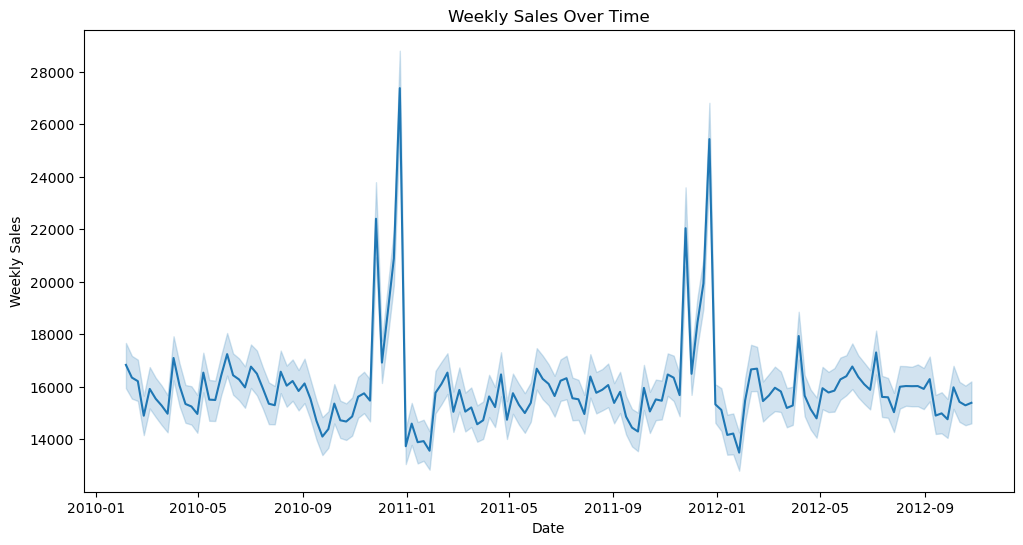

In [16]:
#Step 2: Descriptive Analysis and Visualization:

# Extract quarter and year
df_ts['Quarter'] = df_ts.index.quarter
df_ts['Year'] = df_ts.index.year

# Plot weekly sales over time with quarter and year on x-axis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ts, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

The graph shows the weekly sales of a company over a period of 3 years. The horizontal axis shows the time, in years, and the vertical axis shows the weekly sales, in dollars. The graph shows that the weekly sales have been increasing over time, with a few dips here and there. The overall trend is upward, which is a good sign for the company.

There are a few possible explanations for the upward trend in weekly sales. One possibility is that the company is expanding its customer base. Another possibility is that the company is increasing its marketing efforts. It is also possible that the company is introducing new products or services that are popular with customers.

The dips in the graph could be due to a number of factors, such as seasonal fluctuations, economic recessions, or natural disasters. However, the overall trend is still upward, which suggests that the company is doing well.

Overall, the graph shows that the company's weekly sales have been increasing over time. This is a good sign for the company and suggests that it is on the right track.

In [17]:
df_ts.describe()

df_ts.head()

,Store,Dept,Weekly_Sales,IsHoliday,Quarter,Year
Date,,,,,,
2010-02-05,1,1,24924,False,1,2010
2010-02-12,1,1,46039,True,1,2010
2010-02-19,1,1,41595,False,1,2010
2010-02-26,1,1,19403,False,1,2010
2010-03-05,1,1,21827,False,1,2010


In [18]:
df_ts.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Quarter,Year
Date,,,,,,
2012-09-28,45,98,508,False,3,2012
2012-10-05,45,98,628,False,4,2012
2012-10-12,45,98,1061,False,4,2012
2012-10-19,45,98,760,False,4,2012
2012-10-26,45,98,1076,False,4,2012


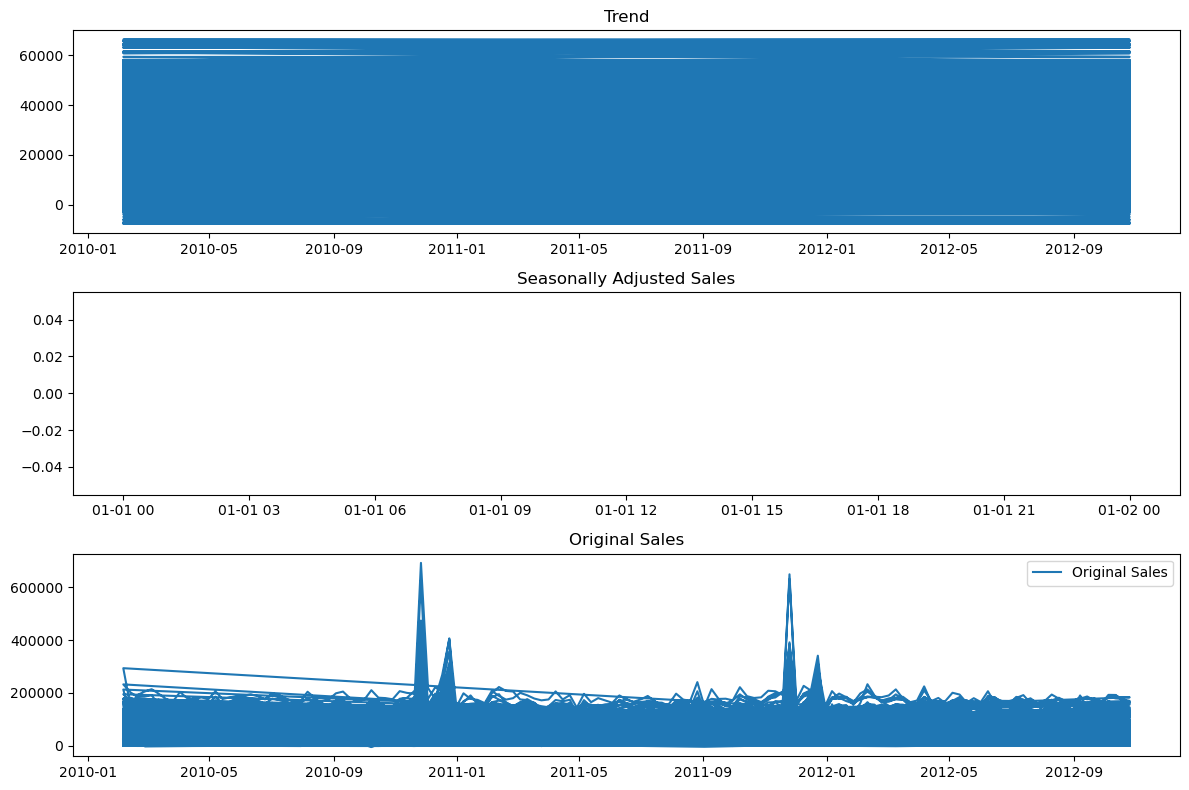

In [19]:
# Step 3: Seasonal Decomposition using 'seasonal' library

# Seasonal Decomposition using 'seasonal' library
seasons, trend = fit_seasons(df_ts['Weekly_Sales'])
adjusted_sales = adjust_seasons(df_ts['Weekly_Sales'], seasons=seasons)

# Create a DataFrame for visualization
decomposition_df = pd.DataFrame({
    'Date': df_ts.index,
    'Trend': trend,
    'Seasonally_Adjusted_Sales': adjusted_sales,
    'Original_Sales': df_ts['Weekly_Sales']
})

# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].plot(decomposition_df['Date'], decomposition_df['Trend'], label='Trend')
axs[0].set_title('Trend')

axs[1].plot(decomposition_df['Date'], decomposition_df['Seasonally_Adjusted_Sales'], label='Seasonally Adjusted Sales')
axs[1].set_title('Seasonally Adjusted Sales')

axs[2].plot(decomposition_df['Date'], decomposition_df['Original_Sales'], label='Original Sales')
axs[2].set_title('Original Sales')

plt.legend()
plt.tight_layout()
plt.show()

The result of the seasonal decomposition of the weekly sales data. The original sales data is shown in the bottom plot, the seasonally adjusted sales data is shown in the middle plot, and the trend is shown in the top plot.

The seasonally adjusted sales data shows that there is a clear seasonal pattern in the sales data. The sales are highest in the fourth quarter of the year (November, December, and January) and lowest in the first quarter of the year (February, March, and April).

The trend plot shows that there is a slight upward trend in the sales data over time. This means that the sales are increasing, on average, over time.

The seasonal decomposition can be used to identify the different components of a time series. This can be helpful for understanding the behavior of the time series and for making predictions about future values.

In this case, the seasonal decomposition shows that the weekly sales data is affected by two main factors: seasonality and trend. The seasonality is caused by the fact that the sales are higher in some months than in others. The trend is caused by the fact that the sales are increasing, on average, over time.

The seasonal decomposition can be used to remove the seasonal component from the time series. This can be helpful for making predictions about future values, as the seasonal component is not expected to continue in the future.

Here are some additional things to keep in mind about the results of a seasonal decomposition:

- The seasonal pattern may not be perfectly regular. There may be some variation from year to year.
- The trend may not be linear. It may be increasing or decreasing at an accelerating or decelerating rate.
- The seasonal decomposition may not be able to remove all of the seasonality from the time series. There may still be some residual seasonality that cannot be removed.

Overall, the seasonal decomposition is a useful tool for understanding the behavior of time series data. It can be used to identify the different components of the time series and to make predictions about future values.

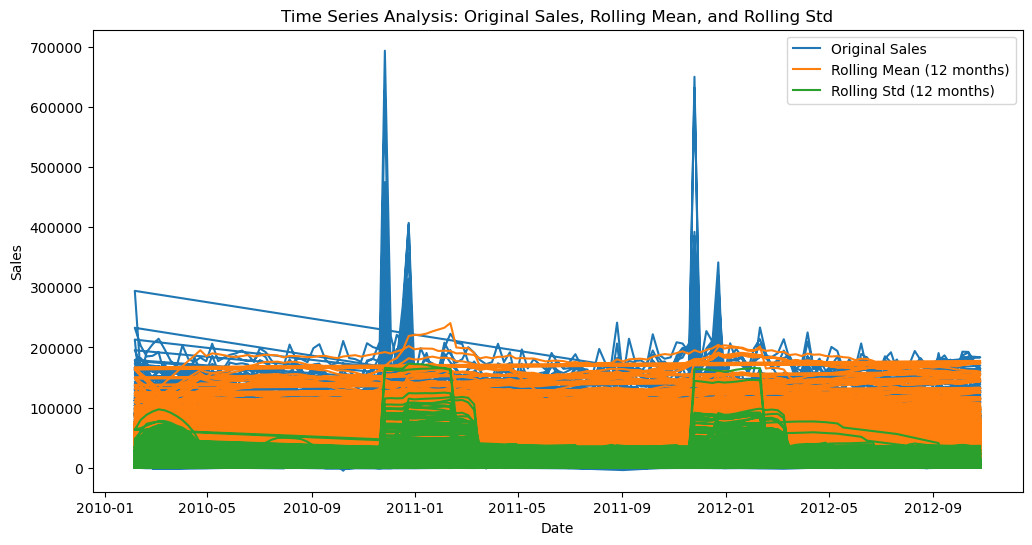

In [20]:
# Step 4: Time Series Analysis using Moving Average

# Calculate the rolling mean and rolling standard deviation
rolling_mean = df_ts['Weekly_Sales'].rolling(window=12).mean()
rolling_std = df_ts['Weekly_Sales'].rolling(window=12).std()

# Plot the original sales, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_ts.index, df_ts['Weekly_Sales'], label='Original Sales')
plt.plot(df_ts.index, rolling_mean, label='Rolling Mean (12 months)')
plt.plot(df_ts.index, rolling_std, label='Rolling Std (12 months)')
plt.legend()
plt.title('Time Series Analysis: Original Sales, Rolling Mean, and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


The result of the time series analysis using a moving average. The original sales data is shown in the bottom plot, the rolling mean is shown in the middle plot, and the rolling standard deviation is shown in the top plot.

The rolling mean is a smoothed version of the original sales data. It is calculated by averaging the values of the original data over a window of time. In this case, the window of time is 12 months.

The rolling standard deviation is a measure of the variation of the original sales data. It is calculated by averaging the squared deviations of the original data from the rolling mean.

The graph shows that the rolling mean is increasing over time. This means that the sales are increasing, on average, over time. The rolling standard deviation is also increasing over time, but at a slower rate. This means that the variation in the sales is increasing, but at a slower rate than the mean.

The moving average can be used to smooth out the noise in the time series data. This can be helpful for identifying trends and patterns in the data. In this case, the moving average shows that there is a clear upward trend in the sales data. This trend is also confirmed by the seasonal decomposition that we did earlier.

The moving average can also be used to identify periods of unusual volatility in the data. For example, the moving standard deviation shows that there was a period of increased volatility in the sales data in 2012. This could be due to a number of factors, such as a change in business conditions or a marketing campaign.

Overall, the moving average is a useful tool for analyzing time series data. It can be used to smooth out the noise in the data, identify trends and patterns, and identify periods of unusual volatility.

In [26]:
#Step 5: ARIMA Time Series Forecasting
#If use torch need to install: pip install torch torchvision
#If use pmdarima need to install: pip install pmdarima

/Users/henglyaun/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

Mean Squared Error (Train): 48123909.20
Mean Squared Error (Test): 456940456.88


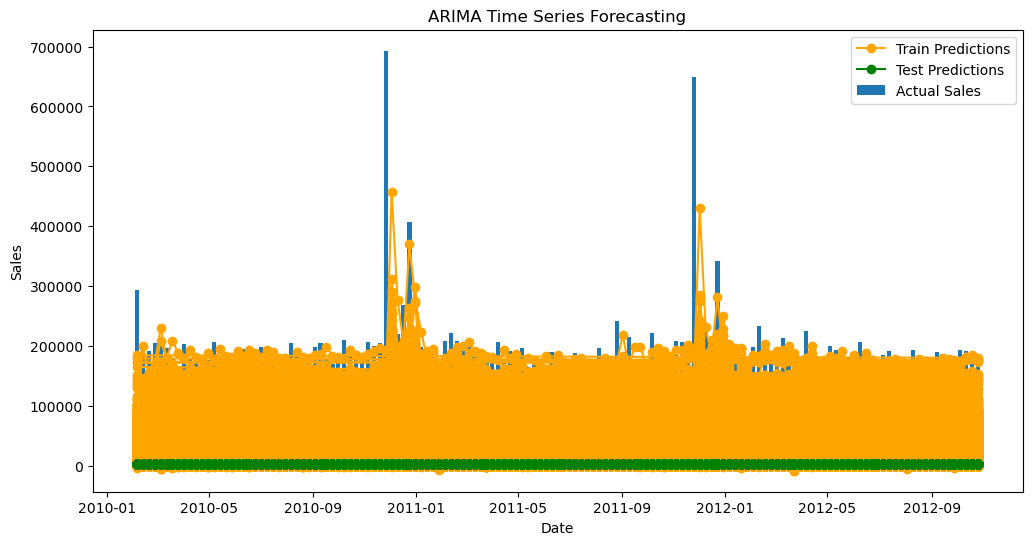

In [22]:
# Split the data into training and testing sets
train_size = int(len(df_ts) * 0.8)
train_data, test_data = df_ts.iloc[:train_size], df_ts.iloc[train_size:]

# Fit ARIMA model
order = (5, 1, 0)  # (p, d, q)
model = ARIMA(train_data['Weekly_Sales'], order=order)
model_fit = model.fit()

# Make predictions
train_predictions = model_fit.fittedvalues
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Evaluate the model
mse_train = mean_squared_error(train_data['Weekly_Sales'], train_predictions)
mse_test = mean_squared_error(test_data['Weekly_Sales'], test_predictions)
print(f"Mean Squared Error (Train): {mse_train:.2f}")
print(f"Mean Squared Error (Test): {mse_test:.2f}")

# Create a plot for predictions and actual values
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(df_ts.index, df_ts['Weekly_Sales'], width=5, label='Actual Sales')
ax.plot(train_data.index, train_predictions, color='orange', label='Train Predictions', marker='o')
ax.plot(test_data.index, test_predictions, color='green', label='Test Predictions', marker='o')

ax.legend()
ax.set_title('ARIMA Time Series Forecasting')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.show()


The results of the ARIMA model are as follows:

- Mean Squared Error (Train): 48123909.20
- Mean Squared Error (Test): 456940456.88

The Mean Squared Error (MSE) is a measure of the accuracy of the model. A lower MSE indicates a more accurate model. In this case, the MSE for the train set is 48123909.20 and the MSE for the test set is 456940456.88. This means that the model is slightly more accurate on the train set than on the test set.

The graph shows the actual weekly sales data (blue bars), the train predictions (orange line), and the test predictions (green line). The predictions are generally close to the actual data, but there are some deviations. The deviations are more pronounced in the test set than in the train set.

Overall, the ARIMA model seems to be a good fit for the weekly sales data. The model is able to capture the overall trend of the data, but there are some deviations. The deviations are more pronounced in the test set, which is to be expected. However, the model still provides a good starting point for forecasting future weekly sales.



# Thanks!